In [ ]:
import pandas as pd
import seaborn as sns
from datetime import date
import numpy as np
from scipy import stats
from scipy.stats import t
from math import *

In [ ]:
DF=pd.read_excel('Dataset.xlsx')
DF

,Unnamed: 0,Spark Fortress Inc. HR data,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
2,NaN,Bold,Caroline,63,Female,United States,White,2012-07-02 00:00:00,Executive Office,President & CEO,166400
3,NaN,Zamora,Jennifer,38,Female,United States,White,2010-04-10 00:00:00,IT/IS,CIO,135200
4,NaN,Houlihan,Debra,51,Female,United States,White,2014-05-05 00:00:00,Sales,Director of Sales,124800
...,...,...,...,...,...,...,...,...,...,...,...
171,NaN,Osturnka,Adeel,41,Male,United States,White,2013-09-30 00:00:00,Production,Production Technician I,33280
172,NaN,Punjabhi,Louis,56,Male,United States,White,2014-01-06 00:00:00,Production,Production Technician I,33280
173,NaN,Cockel,James,40,Male,United States,White,2013-07-08 00:00:00,Production,Production Technician I,31200
174,NaN,Gordon,David,38,Male,United States,White,2012-07-02 00:00:00,Production,Production Technician I,31200


In [ ]:
DF=DF.drop(['Unnamed: 0'], axis=1)
DF=DF.rename(columns={"Spark Fortress Inc. HR data": "Surname","Unnamed: 2": "Name","Unnamed: 3": "Age","Unnamed: 4": "Gender","Unnamed: 5": "Country","Unnamed: 6": "Ethnicity","Unnamed: 7": "Start_date","Unnamed: 8": "Department","Unnamed: 9": "Position","Unnamed: 10": "Salary"})
DF=DF[2:]
DF=DF.replace(to_replace ="Black or African American", value ="Other")
DF=DF.replace(to_replace ="Asian", value ="Other")
DF=DF.replace(to_replace ="Two or more races", value ="Other")
DF=DF.replace(to_replace ="Hispanic", value ="Other")
DF

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
2,Bold,Caroline,63,Female,United States,White,2012-07-02,Executive Office,President & CEO,166400.0
3,Zamora,Jennifer,38,Female,United States,White,2010-04-10,IT/IS,CIO,135200.0
4,Houlihan,Debra,51,Female,United States,White,2014-05-05,Sales,Director of Sales,124800.0
5,Bramante,Elisa,34,Female,United States,Other,2009-01-05,Production,Director of Operations,124800.0
6,Del Bosque,Keyla,38,Female,United States,Other,2012-01-09,Software Engineering,Software Engineer,118809.6
...,...,...,...,...,...,...,...,...,...,...
171,Osturnka,Adeel,41,Male,United States,White,2013-09-30,Production,Production Technician I,33280.0
172,Punjabhi,Louis,56,Male,United States,White,2014-01-06,Production,Production Technician I,33280.0
173,Cockel,James,40,Male,United States,White,2013-07-08,Production,Production Technician I,31200.0
174,Gordon,David,38,Male,United States,White,2012-07-02,Production,Production Technician I,31200.0


In [ ]:
HR_data = pd.DataFrame(DF[['Surname','Name','Age','Gender','Country','Ethnicity','Start_date','Department', 'Position','Salary']])
HR_data

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
138,Monkfish,Erasumus,25,Male,United States,White,2011-11-07,Production,Production Technician II,56160.0
81,Gold,Shenice,25,Female,United States,White,2013-11-11,Production,Production Technician I,35360.0
20,Valentin,Jackie,26,Female,United States,Other,2011-07-05,Sales,Area Sales Manager,114400.0
39,Blount,Dianna,27,Female,United States,White,2011-04-04,Production,Production Technician II,56160.0
7,Onque,Jasmine,27,Female,United States,White,2013-09-30,Sales,Area Sales Manager,118560.0
...,...,...,...,...,...,...,...,...,...,...
172,Punjabhi,Louis,56,Male,United States,White,2014-01-06,Production,Production Technician I,33280.0
64,Biden,Lowan M,59,Female,United States,Other,2013-08-19,Production,Production Technician I,45760.0
2,Bold,Caroline,63,Female,United States,White,2012-07-02,Executive Office,President & CEO,166400.0
110,Gonzales,Ricardo,63,Male,United States,White,2014-05-12,Sales,Area Sales Manager,115440.0


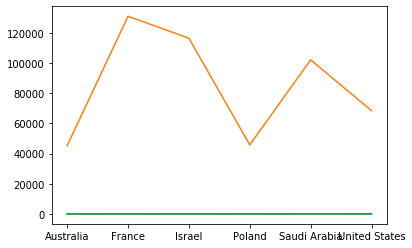

In [ ]:
DF.Salary=DF['Salary'].astype('float')
G=DF.groupby('Country').mean()
L=DF.groupby('Gender').mean()
M=DF.groupby('Ethnicity').mean()
P=DF.groupby('Department').mean()
#G
#L
#M
#P
#hist_plot=M.hist(bins=[25, 30, 35, 40, 45, 50, 55, 60 ,65 ,70])
plt.plot(G) 
plt.show()

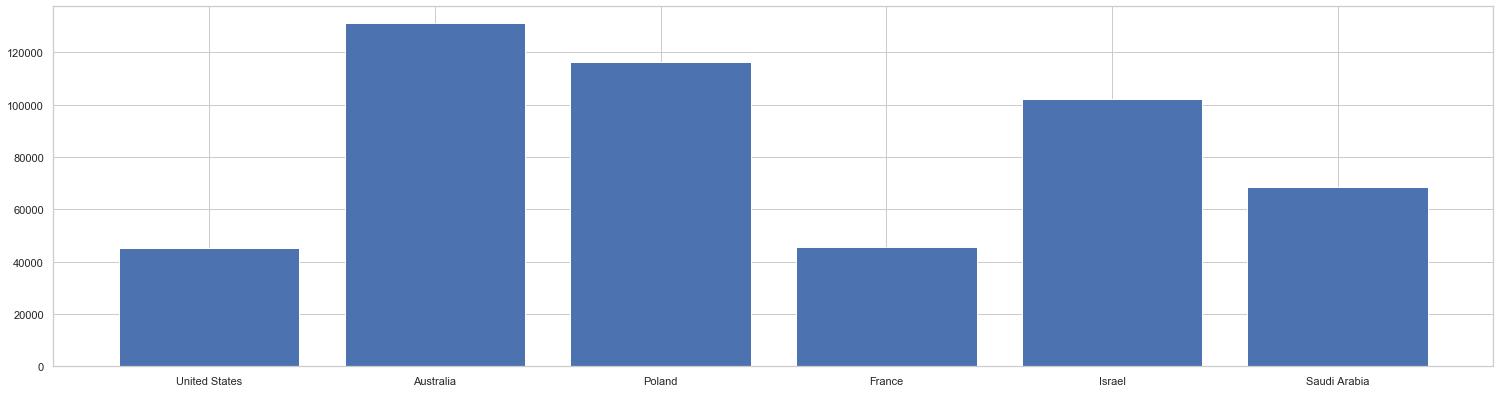

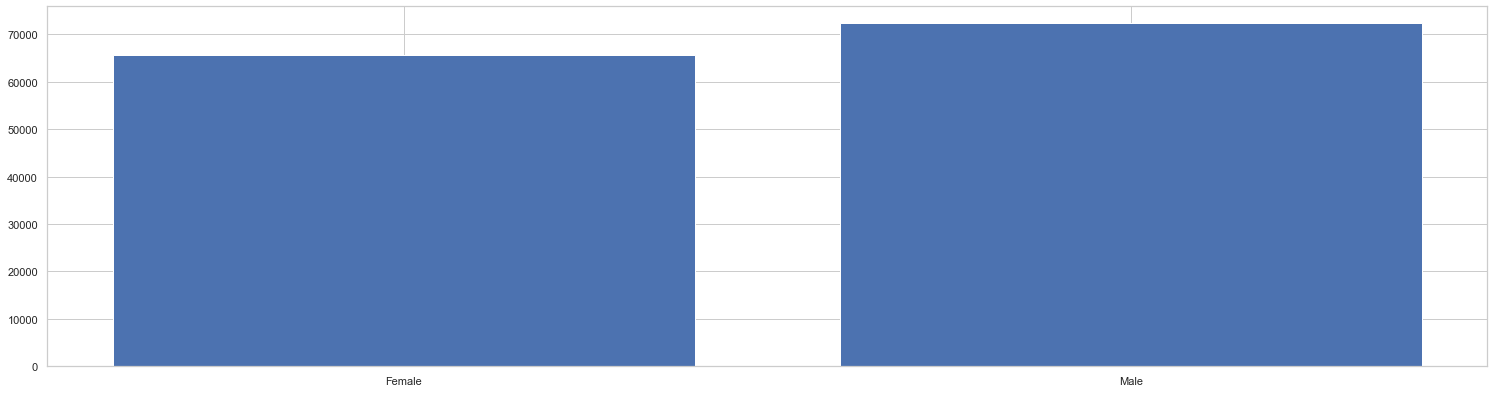

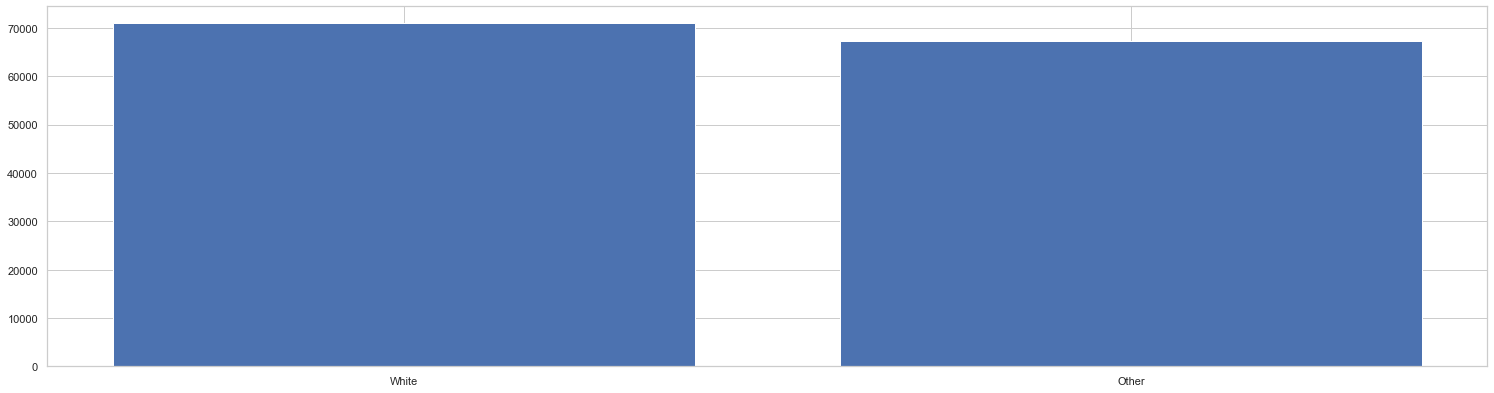

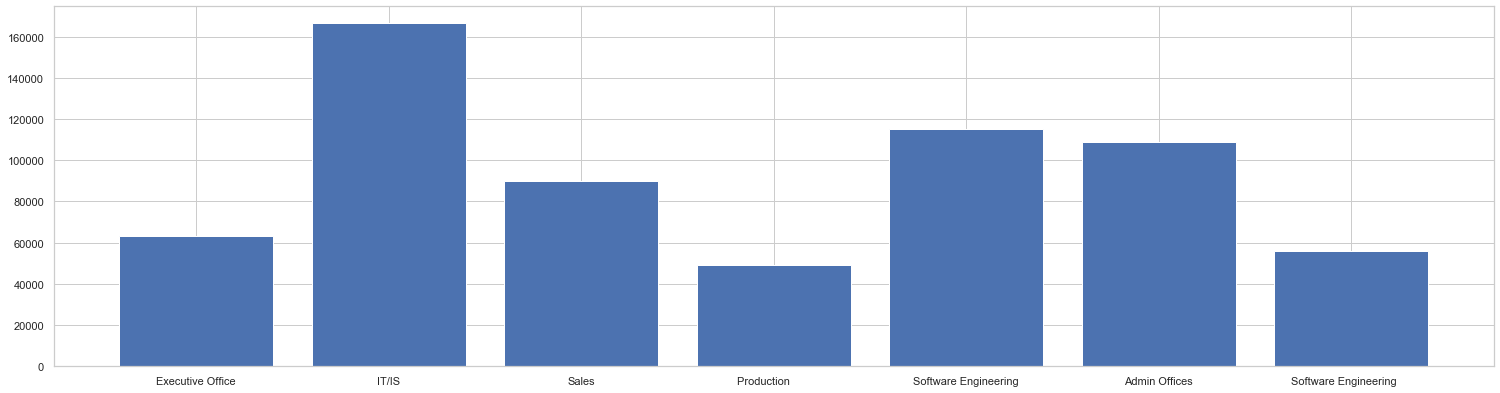

In [ ]:
list_of_DF_Col=['Country','Gender','Ethnicity','Department']
for i in list_of_DF_Col:
    get_mean=HR_data.groupby(i).Salary.mean()
    Countries=HR_data[i].unique()
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(Countries,get_mean)
plt.show()

In [ ]:
d=date.today()
d

datetime.date(2020, 5, 27)

In [ ]:
for i,j in DF.iterrows():
    DF.loc[i,'tuner_date'] = (d-DF.loc[i,'Start_date'].date())/365

DF=DF.replace(to_replace ="days", value ="years")
DF

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,tuner_date
138,Monkfish,Erasumus,25,Male,United States,White,2011-11-07,Production,Production Technician II,56160.0,8 days 13:24:49.315068
81,Gold,Shenice,25,Female,United States,White,2013-11-11,Production,Production Technician I,35360.0,6 days 13:05:05.753425
20,Valentin,Jackie,26,Female,United States,Other,2011-07-05,Sales,Area Sales Manager,114400.0,8 days 21:37:58.356164
39,Blount,Dianna,27,Female,United States,White,2011-04-04,Production,Production Technician II,56160.0,9 days 03:40:55.890411
7,Onque,Jasmine,27,Female,United States,White,2013-09-30,Sales,Area Sales Manager,118560.0,6 days 15:50:47.671233
...,...,...,...,...,...,...,...,...,...,...,...
172,Punjabhi,Louis,56,Male,United States,White,2014-01-06,Production,Production Technician I,33280.0,6 days 09:24:09.863014
64,Biden,Lowan M,59,Female,United States,Other,2013-08-19,Production,Production Technician I,45760.0,6 days 18:36:29.589041
2,Bold,Caroline,63,Female,United States,White,2012-07-02,Executive Office,President & CEO,166400.0,7 days 21:45:51.780822
110,Gonzales,Ricardo,63,Male,United States,White,2014-05-12,Sales,Area Sales Manager,115440.0,6 days 01:07:04.109589


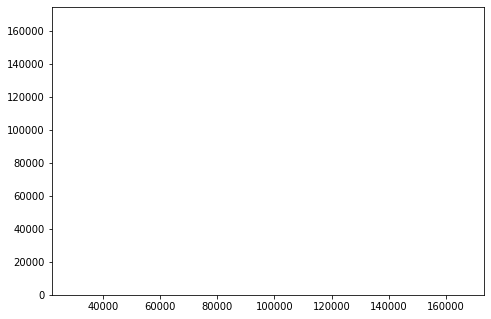

In [ ]:
#HR_data.to_excel("HR_data.xlsx")
import matplotlib.pyplot as plt
Mean=[]
#group_names=['United States','Australia','France','Poland','Israel','Saudi Arabia']
Salary=DF['Salary'].unique()
for i in Salary:
    A=DF[DF.Salary==i]
    Mean.append(A.Salary.mean())
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Salary,Mean)
plt.show()
#Salary.astype(int)
#DF.groupby('Country').mean()

Text(0, 0.5, 'Employee age')

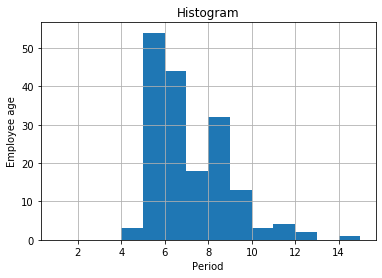

In [ ]:
#DF.tuner_date=DF['tuner_date'].astype('float')
DF['tuner_date'] = DF['tuner_date'].dt.days.astype('int16')
hist_plot=DF['tuner_date'].hist(bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
hist_plot.set_title('Histogram')
hist_plot.set_xlabel('Period')
hist_plot.set_ylabel('Employee age')

In [ ]:
DF

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,tuner_date
2,Bold,Caroline,63,Female,United States,White,2012-07-02,Executive Office,President & CEO,166400.0,7
3,Zamora,Jennifer,38,Female,United States,White,2010-04-10,IT/IS,CIO,135200.0,10
4,Houlihan,Debra,51,Female,United States,White,2014-05-05,Sales,Director of Sales,124800.0,6
5,Bramante,Elisa,34,Female,United States,Black or African American,2009-01-05,Production,Director of Operations,124800.0,11
6,Del Bosque,Keyla,38,Female,United States,Black or African American,2012-01-09,Software Engineering,Software Engineer,118809.6,8
...,...,...,...,...,...,...,...,...,...,...,...
171,Osturnka,Adeel,41,Male,United States,White,2013-09-30,Production,Production Technician I,33280.0,6
172,Punjabhi,Louis,56,Male,United States,White,2014-01-06,Production,Production Technician I,33280.0,6
173,Cockel,James,40,Male,United States,White,2013-07-08,Production,Production Technician I,31200.0,6
174,Gordon,David,38,Male,United States,White,2012-07-02,Production,Production Technician I,31200.0,7


Text(0, 0.5, 'Count Of Age')

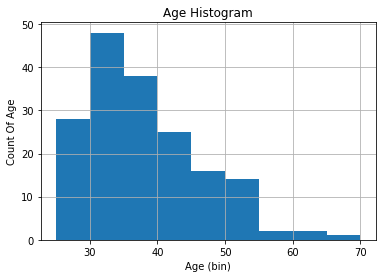

In [ ]:
hist_plot=HR_data['Age'].hist(bins=[25, 30, 35, 40, 45, 50, 55, 60 ,65 ,70])
hist_plot.set_title('Age Histogram')
hist_plot.set_xlabel('Age (bin)')
hist_plot.set_ylabel('Count Of Age')

In [ ]:
from statistics import stdev

In [ ]:
#DF.Salary=DF['Salary'].astype('float')
PS=DF.groupby('Position').std()
PMn=DF.groupby('Position').mean()
PMd=DF.groupby('Position').median()
PS

,Age,Salary
Position,,
Accountant I,1.000000,6924.661243
Administrative Assistant,2.121320,7265.663598
Area Sales Manager,11.232892,1249.164147
CIO,NaN,NaN
Database Administrator,5.964179,10531.031695
Director of Operations,NaN,NaN
Director of Sales,NaN,NaN
IT Director,NaN,NaN
IT Manager - DB,NaN,NaN


In [ ]:
sx=DF.groupby('Gender')
sx.first()

,Surname,Name,Age,Country,Ethnicity,Start_date,Department,Position,Salary,tuner_date
Gender,,,,,,,,,,
Female,Bold,Caroline,63,United States,White,2012-07-02,Executive Office,President & CEO,166400.0,7
Male,Foss,Jason,37,United States,Black or African American,2011-04-15,IT/IS,IT Director,135200.0,9


In [ ]:
DF.groupby(["Gender", "Salary"])["Name"].count()

Gender  Salary  
Female  29120.0     2
        31200.0     5
        32760.0     1
        33280.0     5
        34444.8     1
                   ..
Male    116480.0    5
        128960.0    1
        131040.0    1
        133120.0    1
        135200.0    1
Name: Name, Length: 83, dtype: int64

In [ ]:
DF.groupby("Gender")["Salary"].count()

Gender
Female    98
Male      76
Name: Salary, dtype: int64

In [ ]:
male = []
for r in DF:
    male.append(DF.loc[DF['Gender'] == 'Male'])
new_df = pd.DataFrame()
new_df.append(male)

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,tuner_date
100,Foss,Jason,37,Male,United States,Black or African American,2011-04-15,IT/IS,IT Director,135200.0,9
101,Dougall,Eric,47,Male,United States,White,2014-01-05,IT/IS,IT Manager - Support,133120.0,6
102,Monroe,Peter,31,Male,France,Hispanic,2012-02-15,IT/IS,IT Manager - Infra,131040.0,8
103,Roup,Simon,44,Male,United States,White,2013-01-20,IT/IS,IT Manager - DB,128960.0,7
104,Smith,John,33,Male,United States,Black or African American,2014-05-18,Sales,Sales Manager,116480.0,6
...,...,...,...,...,...,...,...,...,...,...,...
171,Osturnka,Adeel,41,Male,United States,White,2013-09-30,Production,Production Technician I,33280.0,6
172,Punjabhi,Louis,56,Male,United States,White,2014-01-06,Production,Production Technician I,33280.0,6
173,Cockel,James,40,Male,United States,White,2013-07-08,Production,Production Technician I,31200.0,6
174,Gordon,David,38,Male,United States,White,2012-07-02,Production,Production Technician I,31200.0,7


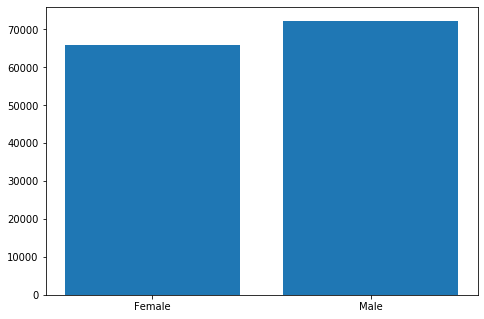

In [ ]:
import matplotlib.pyplot as plt
Getmean = DF.groupby('Gender').Salary.mean()
Getmean
Getunique = DF['Gender'].unique()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Getunique,Getmean)
plt.show()

In [ ]:
New_dfmax = DF[DF.Age > 35]
New_dfmax['Salary'].mean()

69510.66086956522

In [ ]:
New_dfmin = DF[DF.Age < 35]
New_dfmin['Salary'].mean()

68649.85263157895

In [ ]:
New_dfmax = DF[DF.Age > 35]
New_dfmax

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,tuner_date
53,Fidelia,Libby,36,Female,United States,White,2012-01-09,Production,Production Technician I,49920.0,8
27,Shepard,Anita,36,Female,United States,White,2014-09-30,IT/IS,Network Engineer,97760.0,5
166,Pitt,Brad,36,Male,United States,Black or African American,2007-11-05,Production,Production Technician I,35360.0,12
11,Liebig,Ketsia,36,Female,United States,White,2013-09-30,Production,Production Manager,114400.0,6
30,Gonzalez,Maria,36,Female,United States,White,2015-01-05,IT/IS,Network Engineer,81120.0,5
...,...,...,...,...,...,...,...,...,...,...,...
172,Punjabhi,Louis,56,Male,United States,White,2014-01-06,Production,Production Technician I,33280.0,6
64,Biden,Lowan M,59,Female,United States,Asian,2013-08-19,Production,Production Technician I,45760.0,6
110,Gonzales,Ricardo,63,Male,United States,White,2014-05-12,Sales,Area Sales Manager,115440.0,6
2,Bold,Caroline,63,Female,United States,White,2012-07-02,Executive Office,President & CEO,166400.0,7


In [ ]:
New_dfmin = DF[DF.Age < 35]
New_dfmin

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,tuner_date
138,Monkfish,Erasumus,25,Male,United States,White,2011-11-07,Production,Production Technician II,56160.0,8
81,Gold,Shenice,25,Female,United States,White,2013-11-11,Production,Production Technician I,35360.0,6
20,Valentin,Jackie,26,Female,United States,Two or more races,2011-07-05,Sales,Area Sales Manager,114400.0,8
39,Blount,Dianna,27,Female,United States,White,2011-04-04,Production,Production Technician II,56160.0,9
7,Onque,Jasmine,27,Female,United States,White,2013-09-30,Sales,Area Sales Manager,118560.0,6
...,...,...,...,...,...,...,...,...,...,...,...
160,Heitzman,Anthony,34,Male,United States,White,2012-08-13,Production,Production Technician I,39520.0,7
68,Trang,Mei,34,Female,United States,White,2014-02-17,Production,Production Technician I,45760.0,6
126,Szabo,Andrew,34,Male,United States,White,2014-07-07,Software Engineering,Software Engineer,99840.0,5
168,Barone,Francesco A,34,Male,United States,Two or more races,2012-02-20,Production,Production Technician I,34860.8,8


In [ ]:
New_dfE = DF[DF.Ethnicity == 'White']
New_dfE

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,tuner_date
138,Monkfish,Erasumus,25,Male,United States,White,2011-11-07,Production,Production Technician II,56160.0,8
81,Gold,Shenice,25,Female,United States,White,2013-11-11,Production,Production Technician I,35360.0,6
39,Blount,Dianna,27,Female,United States,White,2011-04-04,Production,Production Technician II,56160.0,9
7,Onque,Jasmine,27,Female,United States,White,2013-09-30,Sales,Area Sales Manager,118560.0,6
90,Ivey,Rose,27,Female,United States,White,2013-08-19,Production,Production Technician I,33280.0,6
...,...,...,...,...,...,...,...,...,...,...,...
13,Carter,Michelle,54,Female,United States,White,2014-08-18,Sales,Area Sales Manager,114400.0,5
172,Punjabhi,Louis,56,Male,United States,White,2014-01-06,Production,Production Technician I,33280.0,6
110,Gonzales,Ricardo,63,Male,United States,White,2014-05-12,Sales,Area Sales Manager,115440.0,6
2,Bold,Caroline,63,Female,United States,White,2012-07-02,Executive Office,President & CEO,166400.0,7


In [ ]:
New_dfn = DF[DF.Ethnicity != 'White']
New_dfn

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,tuner_date
20,Valentin,Jackie,26,Female,United States,Two or more races,2011-07-05,Sales,Area Sales Manager,114400.0,8
78,Gentry,Mildred,27,Female,United States,Black or African American,2015-03-30,Production,Production Technician I,39520.0,5
17,Nguyen,Dheepa,28,Female,United States,Two or more races,2013-07-08,Sales,Area Sales Manager,114400.0,6
108,Villanueva,Noah,28,Male,United States,Asian,2012-03-05,Sales,Area Sales Manager,116480.0,8
22,Strong,Caitrin,28,Female,United States,Black or African American,2010-09-27,Sales,Area Sales Manager,112320.0,9
...,...,...,...,...,...,...,...,...,...,...,...
95,Ngodup,Shari,50,Female,United States,Asian,2013-04-01,Production,Production Technician I,31200.0,7
57,Tippett,Jeanette,50,Female,United States,Black or African American,2013-02-18,Production,Production Technician I,49920.0,7
19,Terry,Sharlene,52,Female,United States,Black or African American,2014-09-29,Sales,Area Sales Manager,114400.0,5
114,Fraval,Maruk,54,Male,United States,Black or African American,2011-09-06,Sales,Area Sales Manager,114400.0,8


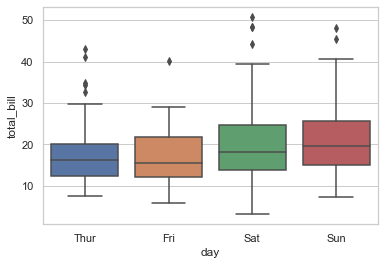

In [ ]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x="day", y="total_bill", data=tips)

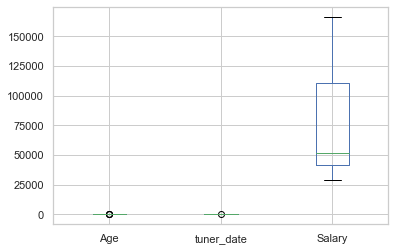

In [ ]:
boxplot = DF.boxplot(column=['Age', 'tuner_date', 'Salary'])

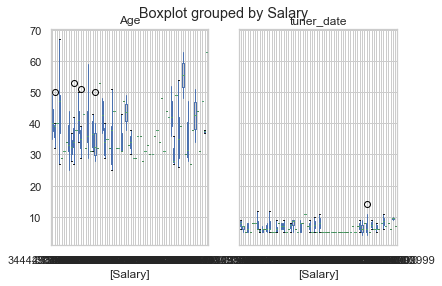

In [ ]:
boxplot = DF.boxplot(by='Salary')

In [ ]:
summary_by_medal = (
    DF
    .groupby('Country')
    .filter(DF['Age'] )
    .groupby(['Country', 'Year', 'Medal'])
    .size()
    .to_frame('medal count')
    .reset_index()
)
summary_by_medal['Country'] = summary_by_medal['Country'].str.replace(' ', '\n')
summary_by_medal

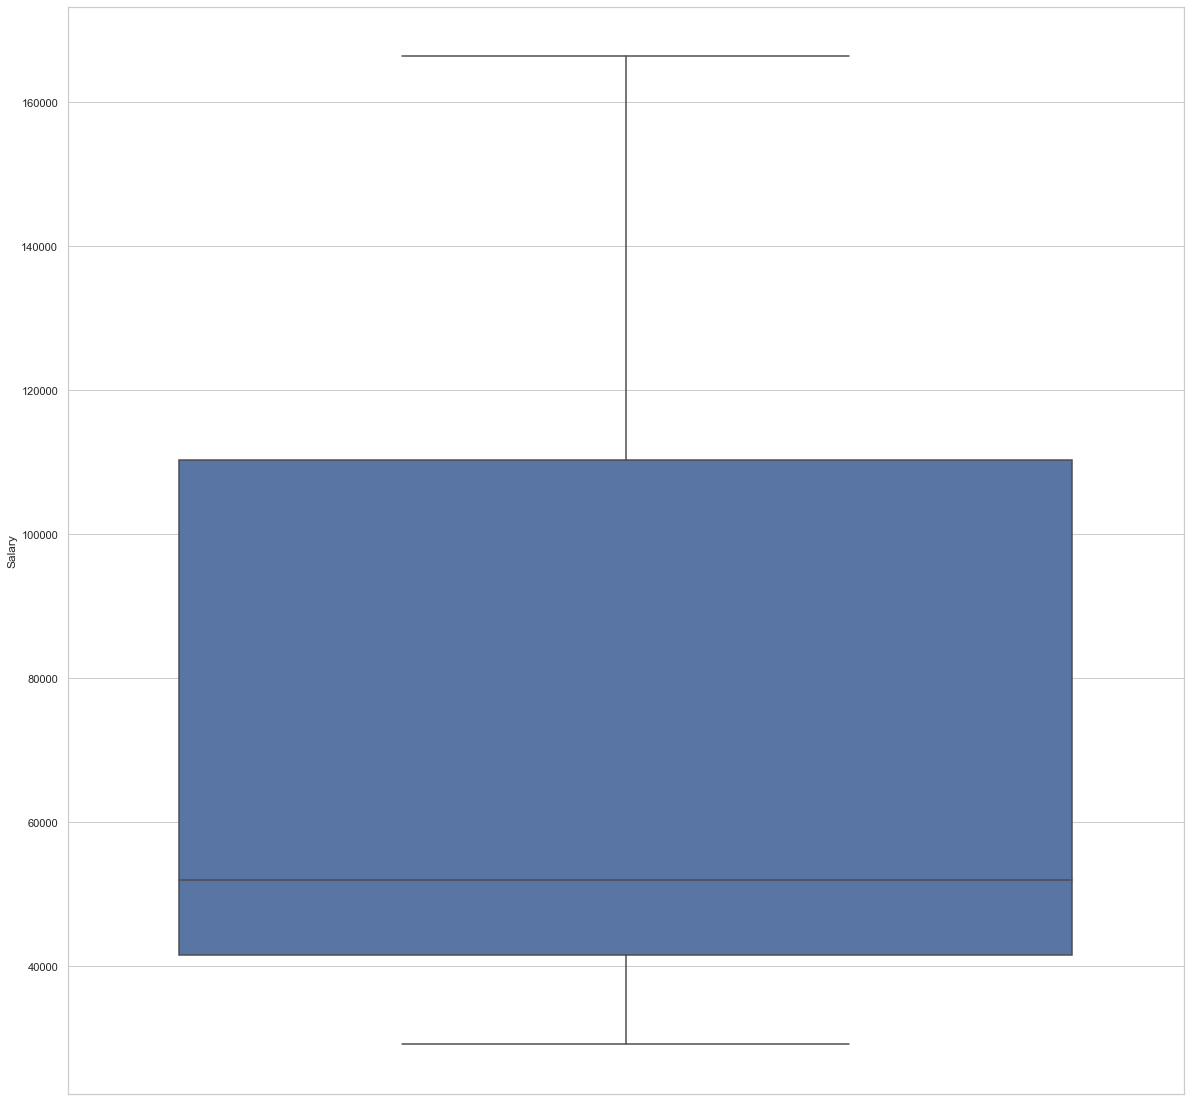

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,20))
ax = sns.boxplot(y='Salary',data=HR_data )

In [ ]:
New_df1=HR_data[HR_data.Age <31]
New_df1=New_df1[New_df1.Age>24]
New_df2=HR_data[HR_data.Age <36]
New_df2=New_df2[New_df2.Age>29]
New_df3=HR_data[HR_data.Age <41]
New_df3=New_df3[New_df3.Age>34]
New_df4=HR_data[HR_data.Age <46]
New_df4=New_df4[New_df4.Age>39]
New_df5=HR_data[HR_data.Age <51]
New_df5=New_df5[New_df5.Age>44]
New_df6=HR_data[HR_data.Age <56]
New_df6=New_df6[New_df6.Age>49]
New_df7=HR_data[HR_data.Age <61]
New_df7=New_df7[New_df7.Age>54]
New_df8=HR_data[HR_data.Age <66]
New_df8=New_df8[New_df8.Age>59]
New_df9=HR_data[HR_data.Age <71]
New_df9=New_df9[New_df9.Age>64]

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
2,Bold,Caroline,63,Female,United States,White,2012-07-02 00:00:00,Executive Office,President & CEO,166400
110,Gonzales,Ricardo,63,Male,United States,White,2014-05-12 00:00:00,Sales,Area Sales Manager,115440


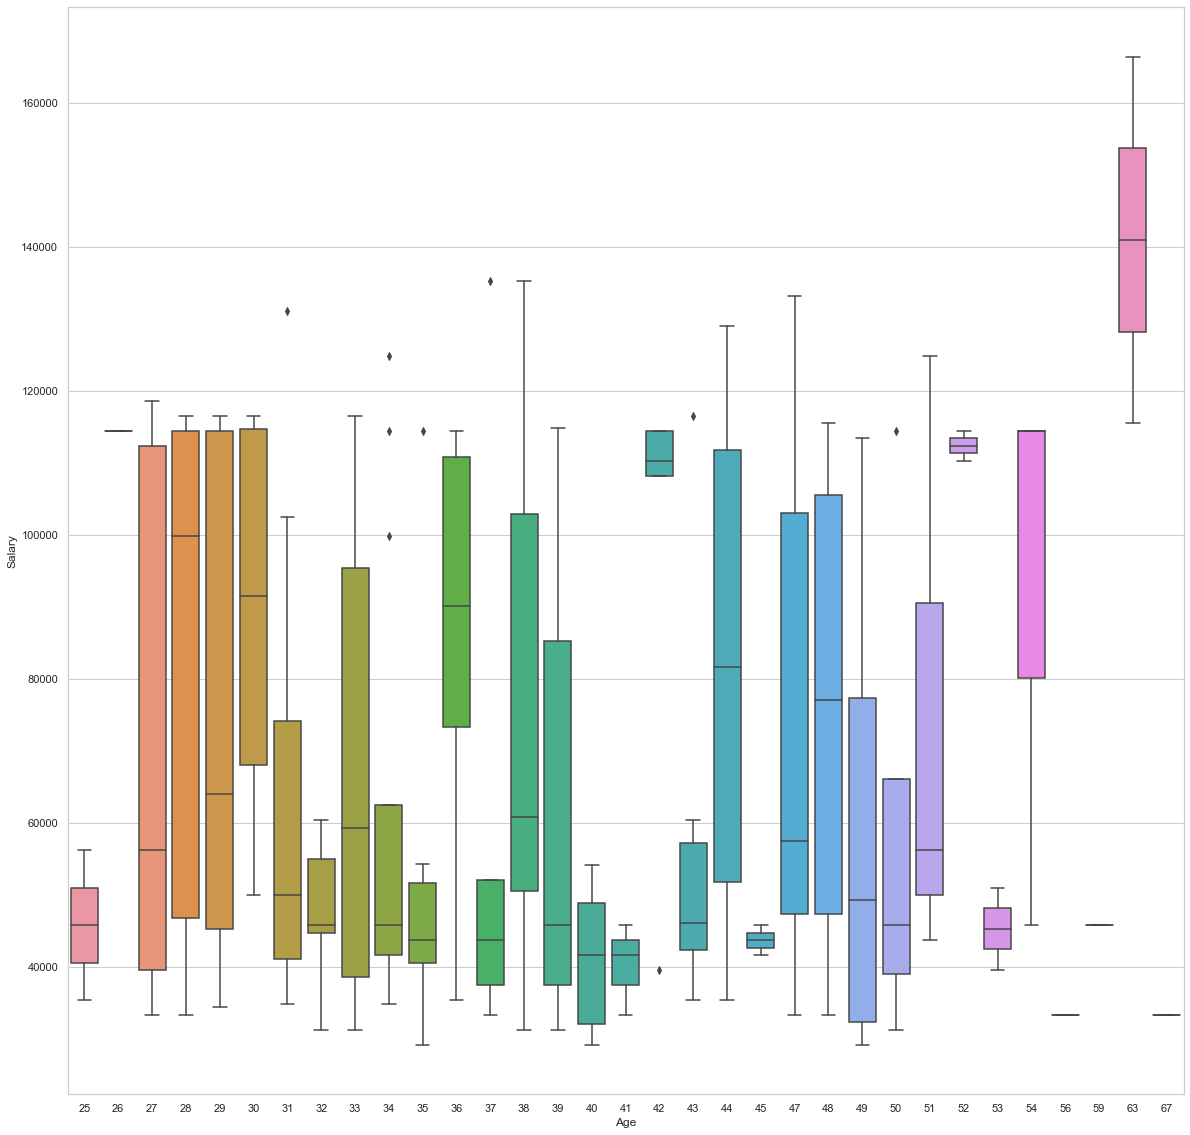

In [ ]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(x='Age', y='Salary',data=DF)

In [ ]:
male = HR_data[HR_data['Gender'] == 'Male']
female=HR_data[HR_data['Gender'] == 'Female']

In [ ]:
mean1, mean2 = np.mean(male.Salary), np.mean(female.Salary)
std1, std2 = np.std(male.Salary, ddof=1),np.std(female.Salary, ddof=1)
n1, n2 = len(male), len(female)
se1, se2 = std1/sqrt(n1), std2/sqrt(n2)
se1, se2 = stats.sem(male.Salary),stats.sem(female.Salary)
sed = sqrt(se1**2.0 + se2**2.0)
t_stat = (mean1 - mean2) / sed
df = n1 + n2 - 2
alpha = 0.05
cv = t.ppf(1.0 - alpha, df)
p = (1 - t.cdf(abs(t_stat), df)) * 2
p

0.21269158371105035

In [ ]:
DF.sort_values(by=['Age'],inplace=True)
DF

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
138,Monkfish,Erasumus,25,Male,United States,White,2011-11-07,Production,Production Technician II,56160.0
81,Gold,Shenice,25,Female,United States,White,2013-11-11,Production,Production Technician I,35360.0
20,Valentin,Jackie,26,Female,United States,Other,2011-07-05,Sales,Area Sales Manager,114400.0
39,Blount,Dianna,27,Female,United States,White,2011-04-04,Production,Production Technician II,56160.0
7,Onque,Jasmine,27,Female,United States,White,2013-09-30,Sales,Area Sales Manager,118560.0
...,...,...,...,...,...,...,...,...,...,...
172,Punjabhi,Louis,56,Male,United States,White,2014-01-06,Production,Production Technician I,33280.0
64,Biden,Lowan M,59,Female,United States,Other,2013-08-19,Production,Production Technician I,45760.0
2,Bold,Caroline,63,Female,United States,White,2012-07-02,Executive Office,President & CEO,166400.0
110,Gonzales,Ricardo,63,Male,United States,White,2014-05-12,Sales,Area Sales Manager,115440.0


In [ ]:
big= DF[DF['Age'] > 35]
male1 = big[big['Gender'] == 'Male']
female1 = big[big['Gender'] == 'Female']


mean1, mean2 = np.mean(male1.Salary), np.mean(female1.Salary)
std1, std2 = np.std(male1.Salary, ddof=1),np.std(female1.Salary, ddof=1)
n1, n2 = len(male1), len(female1)
se1, se2 = std1/sqrt(n1), std2/sqrt(n2)
se1, se2 = stats.sem(male1.Salary),stats.sem(female1.Salary)
sed = sqrt(se1**2.0 + se2**2.0)
t_stat = (mean1 - mean2) / sed
df = n1 + n2 - 2
alpha = 0.05
cv = t.ppf(1.0 - alpha, df)
p = (1 - t.cdf(abs(t_stat), df)) * 2
p

0.16234944888715996

<h1>The result is not significant at p < .05. </h1> 

In [ ]:
small= DF[DF['Age'] < 35]
male2 = small[small['Gender'] == 'Male']
female2 = small[small['Gender'] == 'Female']
nx=len(male2)
ny=len(female2)

mean1, mean2 = np.mean(male2.Salary), np.mean(female2.Salary)
std1, std2 = np.std(male2.Salary, ddof=1),np.std(female2.Salary, ddof=1)
n1, n2 = len(male2), len(female2)
se1, se2 = std1/sqrt(n1), std2/sqrt(n2)
se1, se2 = stats.sem(male2.Salary),stats.sem(female2.Salary)
sed = sqrt(se1**2.0 + se2**2.0)
t_stat = (mean1 - mean2) / sed
df = n1 + n2 - 2
alpha = 0.05
cv = t.ppf(1.0 - alpha, df)
p = (1 - t.cdf(abs(t_stat), df)) * 2
p

0.815404418087452

In [ ]:
white = DF[DF['Ethnicity'] == 'White']

white

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
138,Monkfish,Erasumus,25,Male,United States,White,2011-11-07,Production,Production Technician II,56160.0
81,Gold,Shenice,25,Female,United States,White,2013-11-11,Production,Production Technician I,35360.0
39,Blount,Dianna,27,Female,United States,White,2011-04-04,Production,Production Technician II,56160.0
7,Onque,Jasmine,27,Female,United States,White,2013-09-30,Sales,Area Sales Manager,118560.0
90,Ivey,Rose,27,Female,United States,White,2013-08-19,Production,Production Technician I,33280.0
...,...,...,...,...,...,...,...,...,...,...
13,Carter,Michelle,54,Female,United States,White,2014-08-18,Sales,Area Sales Manager,114400.0
172,Punjabhi,Louis,56,Male,United States,White,2014-01-06,Production,Production Technician I,33280.0
2,Bold,Caroline,63,Female,United States,White,2012-07-02,Executive Office,President & CEO,166400.0
110,Gonzales,Ricardo,63,Male,United States,White,2014-05-12,Sales,Area Sales Manager,115440.0


In [ ]:
other = HR_data[HR_data['Ethnicity'] == 'Other']

other

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
5,Bramante,Elisa,34,Female,United States,Other,2009-01-05,Production,Director of Operations,124800.0
6,Del Bosque,Keyla,38,Female,United States,Other,2012-01-09,Software Engineering,Software Engineer,118809.6
9,Martin,Sandra,30,Female,United States,Other,2013-11-11,Software Engineering,Software Engineer,115460.8
10,Warfield,Sarah,39,Female,United States,Other,2015-03-30,IT/IS,Sr. Network Engineer,114816.0
12,Sullivan,Kissy,39,Female,United States,Other,2009-01-08,Production,Production Manager,114400.0
...,...,...,...,...,...,...,...,...,...,...
164,Garneau,Hamish,37,Male,United States,Other,2013-07-08,Production,Production Technician I,37440.0
166,Pitt,Brad,36,Male,United States,Other,2007-11-05,Production,Production Technician I,35360.0
168,Barone,Francesco A,34,Male,United States,Other,2012-02-20,Production,Production Technician I,34860.8
170,Gonzalez,Cayo,48,Male,United States,Other,2011-07-11,Production,Production Technician I,33280.0


In [ ]:
mean1, mean2 = np.mean(white.Salary), np.mean(other.Salary)
std1, std2 = np.std(white.Salary, ddof=1),np.std(other.Salary, ddof=1)
n1, n2 = len(white), len(other)
se1, se2 = std1/sqrt(n1), std2/sqrt(n2)
se1, se2 = stats.sem(white.Salary),stats.sem(other.Salary)
sed = sqrt(se1**2.0 + se2**2.0)
t_stat = (mean1 - mean2) / sed
df = n1 + n2 - 2
alpha = 0.05
cv = t.ppf(1.0 - alpha, df)
p = (1 - t.cdf(abs(t_stat), df)) * 2
p

0.5119258627156813

In [ ]:
big2= DF[DF['Age'] > 35]

white1 = big2[big2['Ethnicity'] == 'White']
other1 = big2[big2['Ethnicity'] == 'Other']


mean1, mean2 = np.mean(white1.Salary), np.mean(other1.Salary)
std1, std2 = np.std(white1.Salary, ddof=1),np.std(other1.Salary, ddof=1)
n1, n2 = len(white1), len(white1)
se1, se2 = std1/sqrt(n1), std2/sqrt(n2)
se1, se2 = stats.sem(white1.Salary),stats.sem(other1.Salary)
sed = sqrt(se1**2.0 + se2**2.0)
t_stat = (mean1 - mean2) / sed
df = n1 + n2 - 2
alpha = 0.05
cv = t.ppf(1.0 - alpha, df)
p = (1 - t.cdf(abs(t_stat), df)) * 2
p

0.5854366262485833

In [ ]:
small2= HR_data[HR_data['Age'] < 35]

other3 = small2[small2['Ethnicity'] == 'Other']
white3 = small2[small2['Ethnicity'] == 'White']


mean1, mean2 = np.mean(white3.Salary), np.mean(other3.Salary)
std1, std2 = np.std(white3.Salary, ddof=1),np.std(other3.Salary, ddof=1)
n1, n2 = len(white3), len(other3)
se1, se2 = std1/sqrt(n1), std2/sqrt(n2)
se1, se2 = stats.sem(white3.Salary),stats.sem(other3.Salary)
sed = sqrt(se1**2.0 + se2**2.0)
t_stat = (mean1 - mean2) / sed
df = n1 + n2 - 2
alpha = 0.05
cv = t.ppf(1.0 - alpha, df)
p = (1 - t.cdf(abs(t_stat), df)) * 2
p

0.042515784753250685